# Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

## Import Libraries
Import all necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC

### The Data
Read the train dataset in to a pandas dataframe

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#Here we drop the Name, Ticket and PassengerId columns as they do not contribute to the machine learning model.

train.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)
test.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# Exploratory Data Analysis

## Missing Data
Use the heatmap functionality of seaborn to see where we are missing data.

<AxesSubplot:>

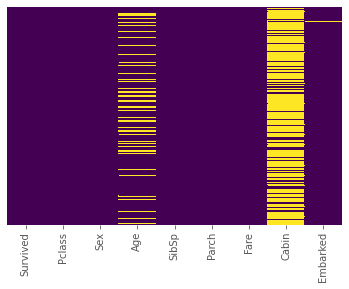

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Create a histogram for the target variable "Survived". You can use the seaborn.countplot function. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

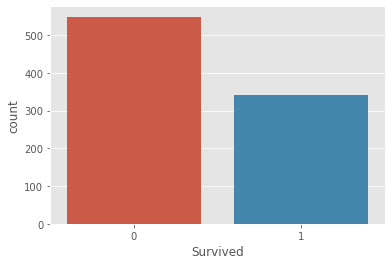

In [4]:
sns.countplot(x=train['Survived'])

Create a histogram for the target variable "Survived" for males and females. 

C:\Users\Asus\.conda\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

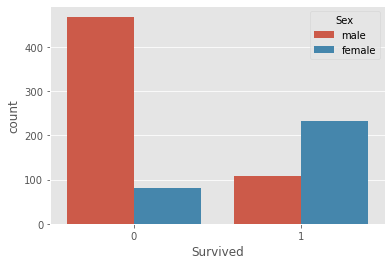

In [5]:
sns.countplot(train['Survived'], hue=train['Sex'])

Create a histogram for the  "Pclass" feature.

C:\Users\Asus\.conda\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

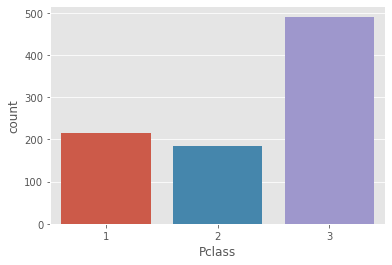

In [6]:
sns.countplot(train['Pclass'])

## Data Cleaning
Fill in the missing data points with the average age for the age column. Drop the Cabin columna and all the row that have feature Emkarked that is NaN. 

In [7]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)
train["Embarked"].dropna()
test["Embarked"].dropna()

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

## Converting Categorical Features 

Use pandas.get_dummies() function to convert categorical data

In [8]:
train=pd.get_dummies(train, drop_first=True)
test=pd.get_dummies(test, drop_first=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression Model
## Train Test Split

In [9]:
#XTrain,XTest,YTrain,YTest = train_test_split(x,y, test_size=0.2, random_state=18)

xTrain, xTest, yTrain, yTest=train_test_split(train.drop(['Survived'], axis=1), train['Survived'], test_size=0.3, random_state=69)

## Training and Predicting

Train a Logistic Regression model with the training data. 

In [10]:
lr=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=6, fit_intercept=True, intercept_scaling=1, class_weight=None)
lr.fit(xTrain, yTrain)
test_predicted=lr.predict(xTest)

C:\Users\Asus\.conda\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation

Compute precision, recall, f1-score. Use the classification report from sklearn.metrics.

In [11]:
print(classification_report(yTest,test_predicted))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       168
           1       0.74      0.71      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



# Support Vector Machines

## Train a Support Vector Classifier

In [12]:
svc=SVC()
svc.fit(xTrain, yTrain)
print(classification_report(yTest,svc.predict(xTest)))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       168
           1       0.61      0.28      0.38       100

    accuracy                           0.66       268
   macro avg       0.64      0.59      0.58       268
weighted avg       0.65      0.66      0.63       268



## Gridsearch Practice
Apply GridSearch to find the optimal values of C and gamma. Create a GridSearchCV object and fit it to the training data.

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300], 'kernel': ['rbf'], 'gamma': [10,1,0.1,0.01,0.001,0.0001]}

grid=GridSearchCV(SVC(), param_grid, verbose=1,  scoring='accuracy', refit=True)
grid.fit(train.drop(['Survived'], axis=1), train['Survived'])

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [14]:
print(grid.best_params_)
print(grid.best_estimator_)
print('Mean cross-validated score of the best_estimator: ', grid.best_score_)
print('The number of cross-validation splits (folds/iterations): ', grid.n_splits_)

{'C': 300, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=300, gamma=0.001)
Mean cross-validated score of the best_estimator:  0.796874019207834
The number of cross-validation splits (folds/iterations):  5


## Evaluation

Evaluate the grid model by computing the precision, recall and f1-score. Use the classification report from sklearn.metrics.

In [15]:
svc=SVC(C=300, gamma=0.001, kernel='rbf')
svc.fit(xTrain, yTrain)
print(classification_report(yTest,svc.predict(xTest)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       168
           1       0.77      0.70      0.73       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



## OPEN END QUESTION
Compare the performance of the logistic regression model and SVM in two paragraphs. Which one is performing better? Why? 



Logistic regression is an algorithm that is used in solving classification problems. It is applied to an input variable (X) where the output variable (y) is a discrete value which ranges between 1 (yes) and 0 (no) which is accuracte for this dataset. Hence logistic regression performs pretty decent without severe tuning and optimization.

The support vector machine is a model used for both classification and regression problems though it is mostly used to solve classification problems. Hence here, SVM performs better because the data is separable and it works well with unstructured and semi-structured data while logistic regression works with already identified independent variables.